In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("netflix_data.csv")

In [3]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Preprocessing
data = pd.read_csv("netflix_data.csv")
descriptions = data["description"]

# Assuming you have already preprocessed the text by converting to lowercase, removing punctuation, and tokenizing the text.
# If not, you can use libraries like nltk for preprocessing.

# Step 2: Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)

# Step 3: Apply LDA
num_topics = 5  # You can adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Get the top n words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10  # Number of top words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()

top_words_per_topic = get_top_words(lda_model, feature_names, n_top_words)

# Print the top words for each topic
for i, topic_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}: {' '.join(topic_words)}")

# You can also get the topic distributions for each description
topic_distributions = lda_model.transform(tfidf_matrix)


Topic 1: friends life new family world young years wild story save
Topic 2: documentary series life stories world comedy stand follows history special
Topic 3: young woman murder man cop agent father detective son police
Topic 4: young love woman man life family daughter new finds mother
Topic 5: school high new world team fight friends old year competition


In [ ]:
# Assuming you already have the 'top_words_per_topic' from the previous code.

# Manually assign labels to each topic based on the top words
topic_labels = {
    0: "Action",
    1: "Drama/Romance",
    2: "Comedy",
    3: "Documentary",
    4: "Fantasy"
}

# Print the top words and their corresponding labels for each topic
for i, topic_words in enumerate(top_words_per_topic):
    label = topic_labels.get(i, "Unknown")
    print(f"Topic {i + 1} - Label: {label}")
    print(f"Top Words: {' '.join(topic_words)}\n")


Topic 1 - Label: Action
Top Words: friends life new family world young years wild story save

Topic 2 - Label: Drama/Romance
Top Words: documentary series life stories world comedy stand follows history special

Topic 3 - Label: Comedy
Top Words: young woman murder man cop agent father detective son police

Topic 4 - Label: Documentary
Top Words: young love woman man life family daughter new finds mother

Topic 5 - Label: Fantasy
Top Words: school high new world team fight friends old year competition



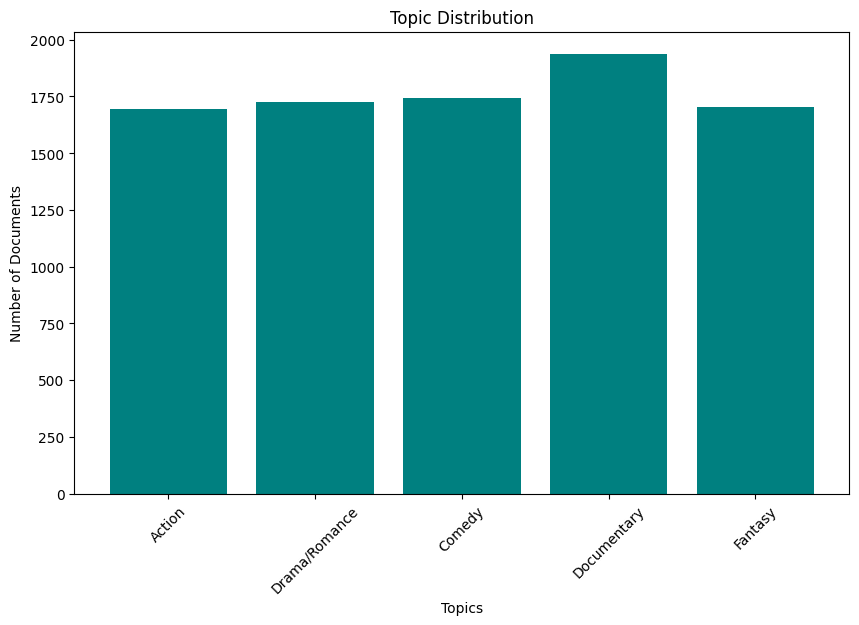

In [ ]:
# Visualization: Distribution of Topics
topic_distribution = lda_model.transform(tfidf_matrix)
topic_names = [topic_labels.get(topic, "Unknown") for topic in topic_distribution.argmax(axis=1)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_labels.values(), topic_distribution.sum(axis=0), color='teal')
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.show()

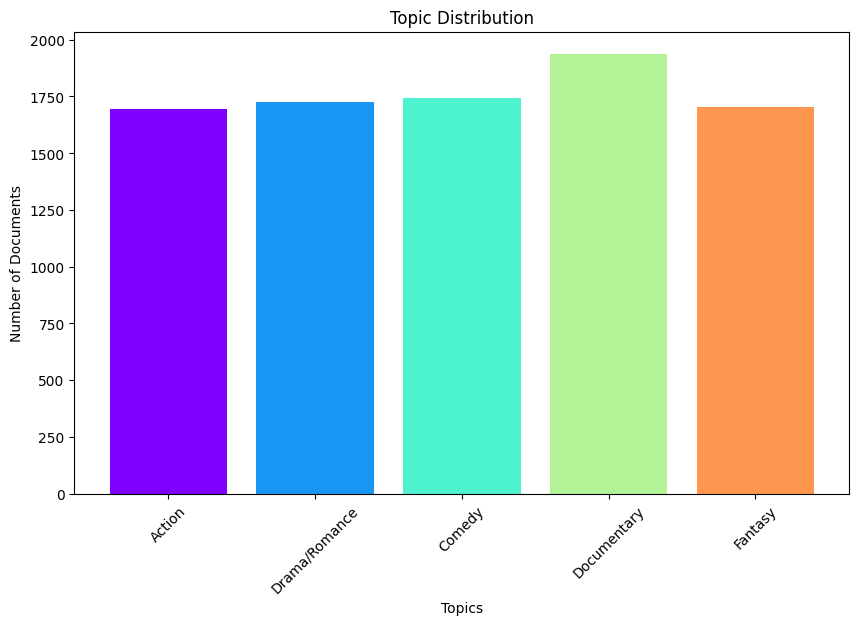

In [ ]:
colors = plt.cm.rainbow([i/float(num_topics) for i in range(num_topics)])

plt.figure(figsize=(10, 6))
plt.bar(topic_labels.values(), topic_distribution.sum(axis=0), color=colors)
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.show()

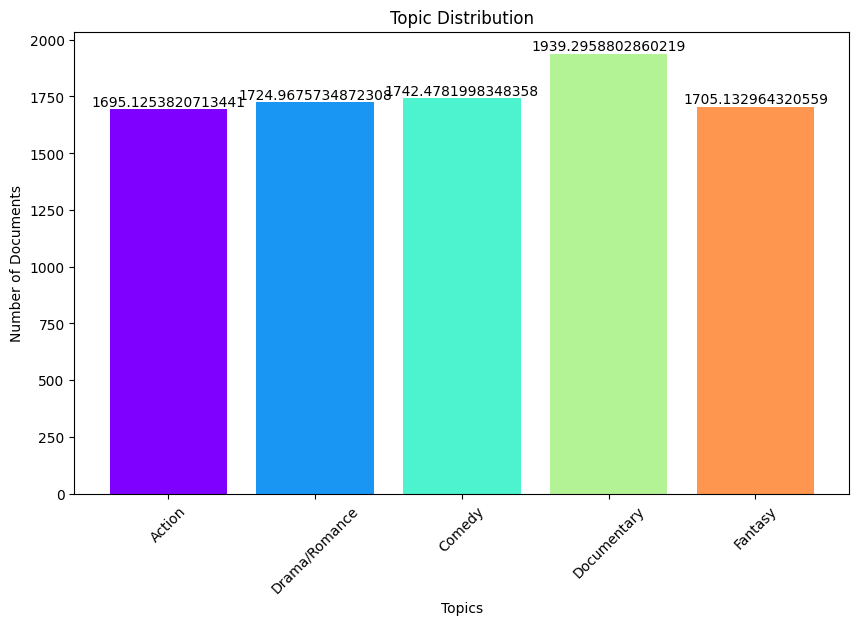

In [ ]:
topic_distribution = lda_model.transform(tfidf_matrix)
topic_names = [topic_labels.get(topic, "Unknown") for topic in topic_distribution.argmax(axis=1)]

# Define a rainbow color palette for the bar plot
colors = plt.cm.rainbow([i/float(num_topics) for i in range(num_topics)])

plt.figure(figsize=(10, 6))
plt.bar(topic_labels.values(), topic_distribution.sum(axis=0), color=colors)
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution')
plt.xticks(rotation=45)

# Add count labels to the bar plot
for i, count in enumerate(topic_distribution.sum(axis=0)):
    label = topic_labels.get(i, "Unknown")
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()
# print the count of documents associated with each topic

In [8]:
import pandas as pd

# Assuming you have already read the CSV file into the 'data' DataFrame
# data = pd.read_csv("netflix_data.csv")

# Get the frequency of each category in the 'listed_in' column
listed_in_freq = data['listed_in'].value_counts()

# Display the frequency of each category
print(listed_in_freq)


Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64


In [9]:
import pandas as pd

# Assuming you have already read the CSV file into the 'data' DataFrame
# data = pd.read_csv("netflix_data.csv")

# Dictionary to map categories to their summarized labels
category_labels = {
    "Dramas": "Drama",
    "International Movies": "Global",
    "Comedies": "Comedy",
    "Documentaries": "Documentary",
    "Action & Adventure": "Action",
    "Independent Movies": "Indie",
    "Children & Family Movies": "Family",
    "Thrillers": "Thriller",
    "Romantic Movies": "Romance",
    "Sci-Fi & Fantasy": "Sci-Fi",
    "Horror Movies": "Horror",
    "Music & Musicals": "Music",
    "Classic Movies": "Classic",
    "Sports Movies": "Sports",
    "Anime Features": "Anime",
    "Stand-Up Comedy": "Stand-Up",
    "Cult Movies": "Cult",
    "TV Shows": "TV Shows",
    "Faith & Spirituality": "Spiritual",
    "LGBTQ Movies": "LGBTQ",
    "Movies": "Movies"
}

# Apply the category_labels dictionary to the 'listed_in' column
data['listed_in_label'] = data['listed_in'].map(category_labels)

# Get the frequency of each summarized label in the 'listed_in_label' column
listed_in_label_freq = data['listed_in_label'].value_counts()

# Display the frequency of each summarized label
print(listed_in_label_freq)


Documentary    359
Stand-Up       334
Family         215
Drama          138
Action         128
Comedy         110
Thriller        65
Movies          57
Horror          55
TV Shows        16
Music           10
Romance          3
Global           3
Sports           1
Sci-Fi           1
Indie            1
Anime            1
Name: listed_in_label, dtype: int64


In [10]:
!pip install nltk gensim


In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming you have already read the CSV file into the 'data' DataFrame
# data = pd.read_csv("netflix_data.csv")

# Preprocessing the descriptions
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    words = tokenizer.tokenize(text.lower())
    words = [word for word in words if word not in stop_words]
    return words

data['description_processed'] = data['description'].apply(preprocess_text)

# Creating a dictionary and corpus for LDA
description_dictionary = Dictionary(data['description_processed'])
description_corpus = [description_dictionary.doc2bow(desc) for desc in data['description_processed']]

# Performing LDA
num_topics = 5  # You can adjust the number of topics as needed
lda_model = LdaModel(description_corpus, num_topics=num_topics, id2word=description_dictionary, passes=10, random_state=42)

# Function to get the main topics for each description
def get_main_topics(lda_model, corpus, num_topics):
    topics = lda_model.get_document_topics(corpus)
    main_topics = []
    for topic in topics:
        main_topic = max(topic, key=lambda x: x[1])[0]
        main_topics.append(main_topic)
    return main_topics

data['main_topic'] = get_main_topics(lda_model, description_corpus, num_topics)

# Getting and printing the actual topics
def get_actual_topics(lda_model):
    actual_topics = {}
    for topic_id in range(lda_model.num_topics):
        words = lda_model.show_topic(topic_id, topn=5)  # You can adjust the number of words shown per topic
        words = [word[0] for word in words]
        actual_topics[topic_id] = words
    return actual_topics

actual_topics = get_actual_topics(lda_model)

# Printing the main topics for each description
for idx, row in data.iterrows():
    print(f"Description: {row['description']}")
    main_topic_id = row['main_topic']
    print(f"Main Topic: {', '.join(actual_topics[main_topic_id])}\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.

Description: The wounds of a traumatic childhood and a corrupt, unjust system push a young man into becoming a cold-blooded, ruthless gangster.
Main Topic: young, man, woman, two, family

Description: After many years away, a woman returns to her hometown, where her mayor father presides over a corrupt, lawless and rundown municipality.
Main Topic: young, man, woman, two, family

Description: Juana Inés de la Cruz, a powerful feminist nun involved in a forbidden love affair with a woman, faces oppression in 17th-century Mexico.
Main Topic: young, man, woman, two, family

Description: Separated at birth, a pair of identical twins unexpectedly reunite as adults and embark on a madcap mission to take down a common enemy from their past.
Main Topic: young, man, woman, two, family

Description: In this family film, never-dull third-grader Judy Moody embarks on a summer adventure with her brother, Stink, and always-up-for-fun Aunt Opal.
Mai

In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Assuming you have already read the CSV file into the 'data' DataFrame
# data = pd.read_csv("netflix_data.csv")

# Preprocessing the descriptions
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def preprocess_text(text):
    words = tokenizer.tokenize(text.lower())
    words = [word for word in words if word not in stop_words]
    return words

data['description_processed'] = data['description'].apply(preprocess_text)

# Creating a dictionary and corpus for LDA
description_dictionary = Dictionary(data['description_processed'])
description_corpus = [description_dictionary.doc2bow(desc) for desc in data['description_processed']]

# Performing LDA
num_topics = 5  # You can adjust the number of topics as needed
lda_model = LdaModel(description_corpus, num_topics=num_topics, id2word=description_dictionary, passes=10, random_state=42)

# Function to get the main topics for each description
def get_main_topics(lda_model, corpus, num_topics):
    topics = lda_model.get_document_topics(corpus)
    main_topics = []
    for topic in topics:
        main_topic = max(topic, key=lambda x: x[1])[0]
        main_topics.append(main_topic)
    return main_topics

data['main_topic'] = get_main_topics(lda_model, description_corpus, num_topics)

# Getting and printing the actual topics
def get_actual_topics(lda_model):
    actual_topics = {}
    for topic_id in range(lda_model.num_topics):
        words = lda_model.show_topic(topic_id, topn=5)  # You can adjust the number of words shown per topic
        words = [word[0] for word in words]
        actual_topics[topic_id] = words
    return actual_topics

actual_topics = get_actual_topics(lda_model)

# Define a mapping dictionary for concise labels
topic_labels = {
    0: "Family",
    1: "Documentary",
    2: "Thriller",
    3: "Romance",
    4: "Comedy"
}

# Printing the main topics for each description with concise labels
for idx, row in data.iterrows():
    print(f"Description: {row['description']}")
    main_topic_id = row['main_topic']
    main_topic_words = actual_topics[main_topic_id]
    main_topic_label = topic_labels[main_topic_id]
    print(f"Main Topic: {main_topic_label} ({', '.join(main_topic_words)})\n")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.

Description: The wounds of a traumatic childhood and a corrupt, unjust system push a young man into becoming a cold-blooded, ruthless gangster.
Main Topic: Documentary (young, man, woman, two, family)

Description: After many years away, a woman returns to her hometown, where her mayor father presides over a corrupt, lawless and rundown municipality.
Main Topic: Documentary (young, man, woman, two, family)

Description: Juana Inés de la Cruz, a powerful feminist nun involved in a forbidden love affair with a woman, faces oppression in 17th-century Mexico.
Main Topic: Documentary (young, man, woman, two, family)

Description: Separated at birth, a pair of identical twins unexpectedly reunite as adults and embark on a madcap mission to take down a common enemy from their past.
Main Topic: Documentary (young, man, woman, two, family)

Description: In this family film, never-dull third-grader Judy Moody embarks on a summer adventure with 